# Lines Planes and Hyperplanes


# Hyperplanes

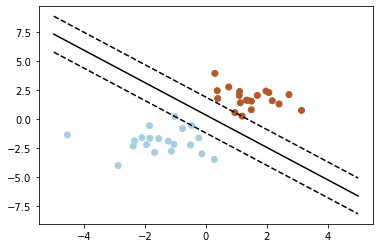

In [4]:
import numpy as np
import pylab as pl
from sklearn import svm

# we create 40 separable points
np.random.seed(0)
X = np.r_[np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2, 2]]
Y = [0] * 20 + [1] * 20

# fit the model
clf = svm.SVC(kernel='linear', C=100)
clf.fit(X, Y)

# get the separating hyperplane
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (clf.intercept_[0]) / w[1]

# plot the parallels to the separating hyperplane that pass through the
# support vectors
b = clf.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = clf.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

# plot the line, the points, and the nearest vectors to the plane
pl.set_cmap(pl.cm.Paired)
pl.plot(xx, yy, 'k-')
pl.plot(xx, yy_down, 'k--')
pl.plot(xx, yy_up, 'k--')

pl.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
           s=80, facecolors='none')
pl.scatter(X[:, 0], X[:, 1], c=Y)

pl.axis('tight')
pl.show()

# NEXT

In [6]:
from sklearn.datasets import make_circles
from matplotlib import pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
visualization=True

In [7]:
def create_data():
	x,y=make_circles(n_samples=800,noise=.07,factor=.4)
	if visualization:
		plt.scatter(x[:,0],x[:,1],c=y+1)
		plt.show()
	return x,y


In [9]:
def project_data(data):
    x=data[:,0]
    y=data[:,1]
    z=x**2+y**2
    return x,y,z

In [10]:
def plot_decision_surface_manual(x,y,z,label):
	fig = plt.figure()
	ax = fig.add_subplot(121,projection='3d')
	ax.scatter(x[label==0],y[label==0],z[label==0],c='r')
	ax.scatter(x[label==1],y[label==1],z[label==1],c='b')
	ax1 = fig.add_subplot(122,projection='3d')
	ax1.scatter(x[label==0],y[label==0],z[label==0],c='r')
	ax1.scatter(x[label==1],y[label==1],z[label==1],c='b')
	plane_x=np.arange(-1.25,1.25,.1)
	plane_y=np.arange(-1.25,1.25,.1)
	X,Y=np.meshgrid(plane_x,plane_y)
	Z=np.zeros(X.shape)
	Z[:,:]=.5
	ax1.plot_surface(X,Y,Z)
	plt.show()

In [11]:
def plot_decision_surface_sklearn(clf,X,y):
    X0 = X[np.where(y == 0)]
    X1 = X[np.where(y == 1)]

    plt.figure()
    
    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
              linestyles=['--', '-', '--'],
              levels=[-.5, 0, .5])
    plt.scatter(X0[:, 0], X0[:, 1], c='r',s=50)
    plt.scatter(X1[:, 0], X1[:, 1], c='b',s=50)
    plt.show()

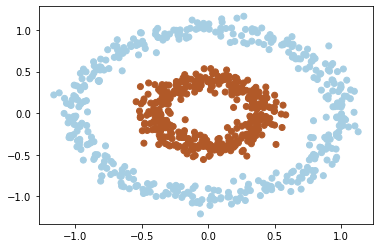

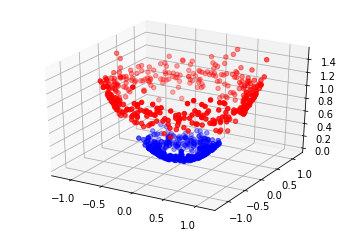

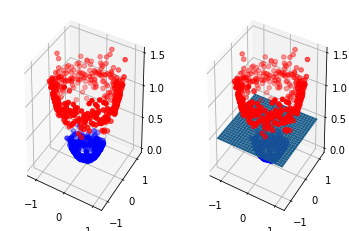

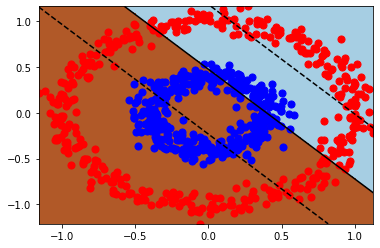

linear  Kernal Accuracy:  0.59


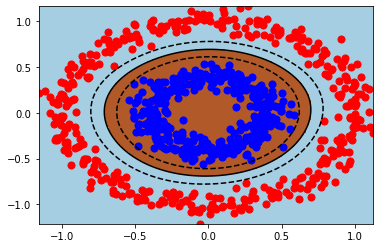

rbf  Kernal Accuracy:  1.0


In [13]:
data,label=create_data()
x,y,z=project_data(data)
if visualization:
	fig = plt.figure()
	ax = fig.add_subplot(111, projection='3d')
	ax.scatter(x[label==0],y[label==0],z[label==0],c='r')
	ax.scatter(x[label==1],y[label==1],z[label==1],c='b')
	plt.show()
	plot_decision_surface_manual(x,y,z,label)
train=np.c_[x,y]
for kernel_type in ['linear','rbf']:
	clf=SVC(kernel=kernel_type)
	clf.fit(train,label)
	if visualization:
		plot_decision_surface_sklearn(clf,train,label)
	output=clf.predict(train)
	print (kernel_type," Kernal Accuracy: ",accuracy_score(label,output))